In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [29]:
milk=pd.read_csv(r'..\Datasets\monthly-milk-production-pounds-p.csv',index_col=0)
milk.index=pd.DatetimeIndex(milk.index)
milk.head()

,Milk
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [30]:
y=milk['Milk']
y_train=y.iloc[:-12,]
y_test=y.iloc[-12:,]

In [31]:
y_train.shape,y_test.shape

((156,), (12,))

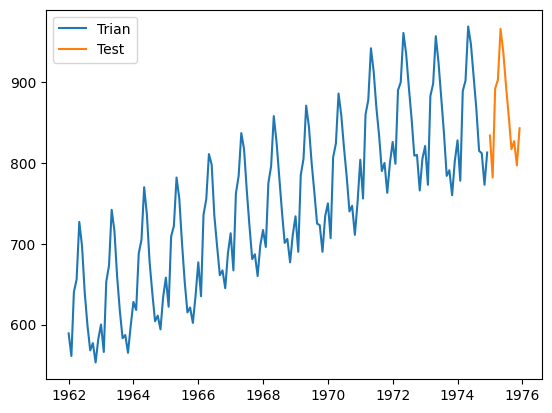

In [32]:
plt.plot(y_train,label='Trian')
plt.plot(y_test,label='Test')
plt.legend()
plt.show()

## Naive Forecasting

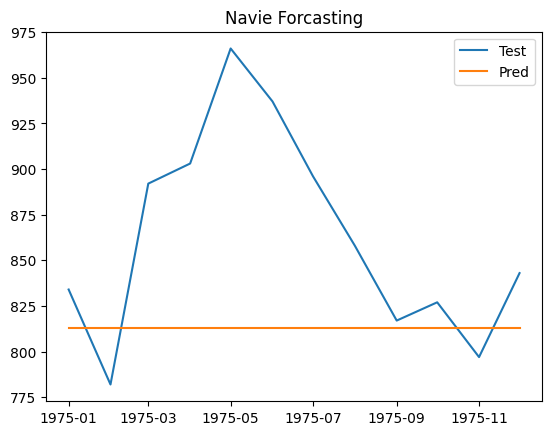

73.4903621799031


In [33]:
last_obs=y_train.iloc[-1]
y_pred=pd.Series(last_obs.repeat(len(y_test)),index=y_test.index)
error=root_mean_squared_error(y_test,y_pred)
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
plt.title("Navie Forcasting")
plt.legend()
plt.show()
print(error)

## Seasonal Forecasting

In [34]:
y_pred =y_train.iloc[-12:]
y_pred.index=y_test.index


## Widow Average Forecasting/ Rolling mean

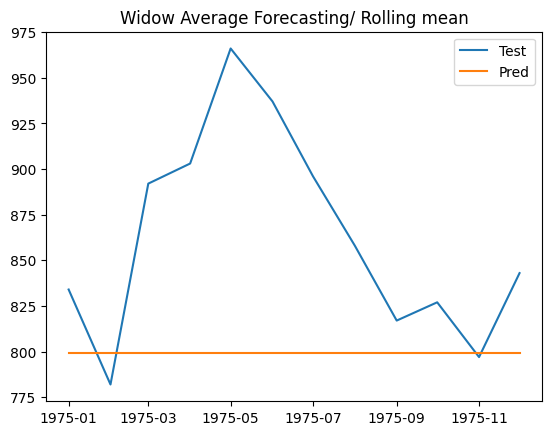

83.34


In [35]:
import numpy as np
span=3
roll_mean=y_train.iloc[-span:].mean()
y_pred=pd.Series(roll_mean.repeat(len(y_test)),index=y_test.index)
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
plt.title("Widow Average Forecasting/ Rolling mean")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.show()
print(error)

## Centereed rolling mean

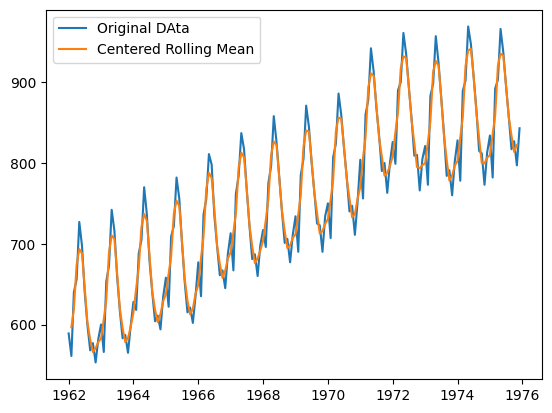

In [36]:
span=3
plt.plot(y,label="Original DAta")
plt.plot(y.rolling(span,center=True).mean(),label='Centered Rolling Mean')
plt.legend()
plt.show()


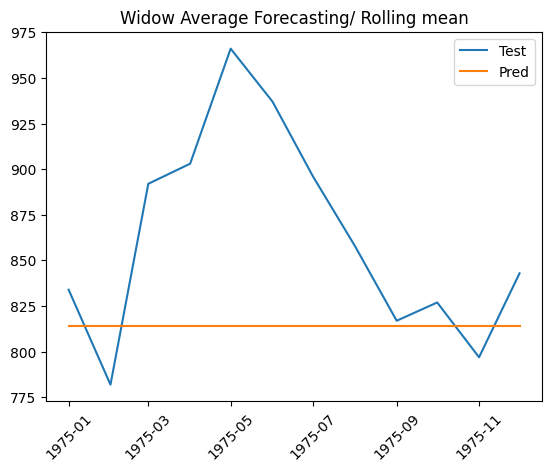

72.66


In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha=0.4
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Widow Average Forecasting/ Rolling mean")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [38]:
alphas=np.linspace(0.01,0.9,10)
scores=[]
for a in alphas:
    ses=SimpleExpSmoothing(y_train)
    fit1=ses.fit(smoothing_level=a)
    y_pred=fit1.forecast(len(y_test))
    scores.append([a,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,root_men_square_error
1,0.108889,57.153455
2,0.207778,60.822252
3,0.306667,66.937404
4,0.405556,72.954970
9,0.900000,75.970633


### Holts Linear Trend


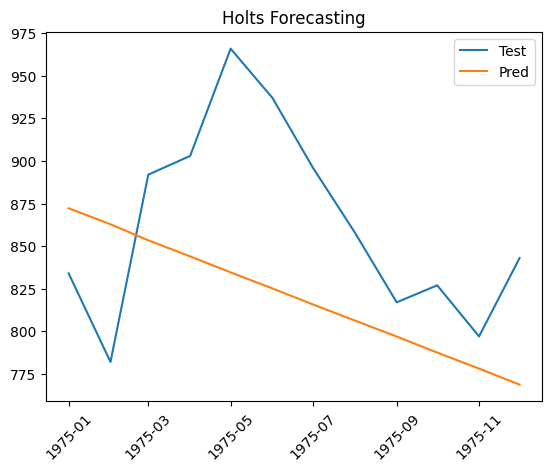

70.54


In [41]:
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha=0.1
beta=0.7
holt = Holt(y_train)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)


In [43]:
alphas=np.linspace(0.01,0.9,100)
betas=np.linspace(0.01,0.9,100)
scores=[]
for a in alphas:
    for b in betas:
        holt=Holt(y_train)
        fit1=holt.fit(smoothing_level=a,smoothing_trend=b)
        y_pred=fit1.forecast(len(y_test))
        scores.append([a,b,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,root_men_square_error
687,0.063939,0.792121,52.763351
774,0.072929,0.675253,52.774336
686,0.063939,0.783131,52.778170
773,0.072929,0.666263,52.780871
688,0.063939,0.801111,52.787976


## Holts Exponenetial Trend

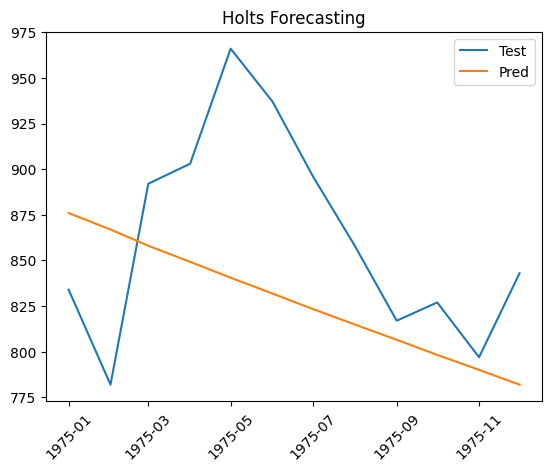

65.6


In [46]:
from statsmodels.tsa.api import Holt
alpha=0.1
beta=0.7
holt = Holt(y_train,exponential=True)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [47]:
alphas=np.linspace(0.01,0.9,100)
betas=np.linspace(0.01,0.9,100)
scores=[]
for a in alphas:
    for b in betas:
        holt=Holt(y_train,exponential=True)
        fit1=holt.fit(smoothing_level=a,smoothing_trend=b)
        y_pred=fit1.forecast(len(y_test))
        scores.append([a,b,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,root_men_square_error
776,0.072929,0.693232,52.810138
865,0.081919,0.594343,52.823161
866,0.081919,0.603333,52.826956
777,0.072929,0.702222,52.829913
775,0.072929,0.684242,52.831802


## Damped Trend

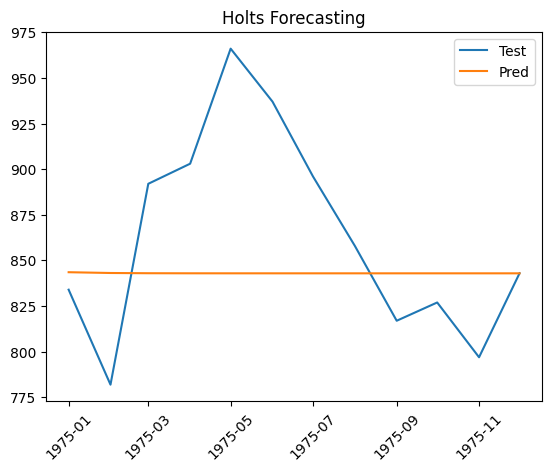

57.66


In [51]:
from statsmodels.tsa.api import Holt
alpha=0.1
beta=0.7
phi=0.3
holt = Holt(y_train,damped=True)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [52]:
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
phi=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for p in phi:
            holt=Holt(y_train,damped=True)
            fit1=holt.fit(smoothing_level=a,smoothing_trend=b,damping_trend=p)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,p,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','phi','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,phi,root_men_square_error
7995,0.90,0.900000,0.712632,54.643209
359,0.01,0.806316,0.900000,54.662362
339,0.01,0.759474,0.900000,54.669214
379,0.01,0.853158,0.900000,54.674443
319,0.01,0.712632,0.900000,54.698934


## Holts Winters Method

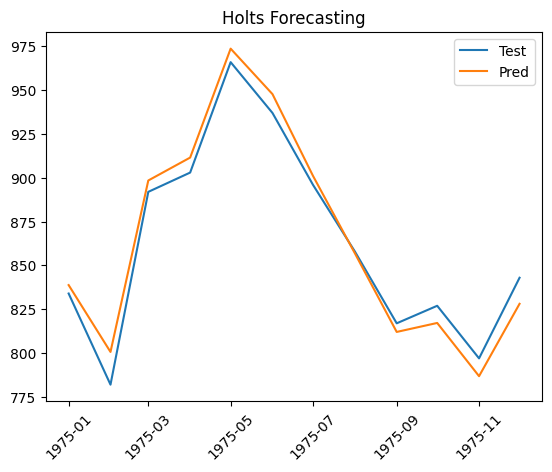

9.72


In [61]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha=0.8
beta=0.02
gamma=0.1
exs = ExponentialSmoothing(y_train,trend='add',seasonal='add')
fit1= exs.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [64]:
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='add')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,p,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
542,0.056842,0.337895,0.01,6.053567
541,0.056842,0.337895,0.01,6.180188
543,0.056842,0.337895,0.01,6.941836
540,0.056842,0.337895,0.01,7.454242
544,0.056842,0.337895,0.01,8.389371


## Holts Winters Multiplicative Method

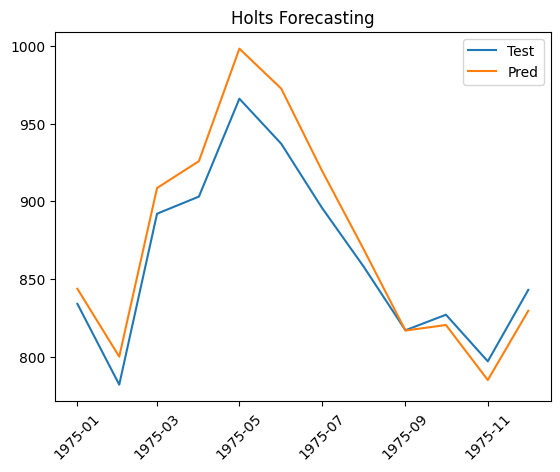

19.53


In [65]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha=0.8
beta=0.02
gamma=0.1
exs = ExponentialSmoothing(y_train,trend='add',seasonal='mul')
fit1= exs.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [66]:
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='add')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,p,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
542,0.056842,0.337895,0.01,6.053567
541,0.056842,0.337895,0.01,6.180188
543,0.056842,0.337895,0.01,6.941836
540,0.056842,0.337895,0.01,7.454242
544,0.056842,0.337895,0.01,8.389371
